In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv
/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv


In [2]:
INPUT_DIR='/kaggle/input/linking-writing-processes-to-writing-quality/'
train_data=pd.read_csv(f'{INPUT_DIR}train_logs.csv')
train_scores=pd.read_csv(f'{INPUT_DIR}train_scores.csv')
test_data=pd.read_csv(f'{INPUT_DIR}test_logs.csv')
train_data.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [4]:
print(f'Number of unique essays in train: {train_data["id"].nunique()}')
print(f'Number of unique essays in test: {test_data["id"].nunique()}')

list(test_data["id"].unique())

Number of unique essays in train: 2471
Number of unique essays in test: 3


['0000aaaa', '2222bbbb', '4444cccc']

In [5]:
print('Total count for up event',train_data['down_event'].nunique())
train_data['down_event'].unique()

Total count for up event 131


array(['Leftclick', 'Shift', 'q', 'Space', 'Backspace', '.', ',', 'Enter',
       'ArrowLeft', "'", ';', 'ArrowRight', '-', '?', 'Tab', '"',
       'ArrowUp', 'ArrowDown', 'Rightclick', '=', 'CapsLock', 'Control',
       'c', 'v', '/', 'Delete', ':', 'z', '[', '$', '(', ')', '+', 'Home',
       'End', '\\', 'Meta', '*', '&', 'AudioVolumeMute', 'x', '!',
       'Insert', 'MediaPlayPause', 'NumLock', '%', 'V', '>', 'Alt',
       'AudioVolumeUp', 'ContextMenu', 'AudioVolumeDown', 'a', '<',
       'PageDown', ']', 'Middleclick', '@', 'F12', 'j', '\x96', 'Dead',
       't', 's', 'n', 'y', '{', 'ScrollLock', '¿', 'Process', '}',
       'MediaTrackPrevious', 'MediaTrackNext', 'F3', '^', 'Unidentified',
       'Cancel', '2', 'i', 'd', 'r', 'e', '`', '\x9b', 'm', '#', '~',
       'PageUp', 'T', 'A', 'b', 'S', 'ModeChange', '_', 'Escape', 'F11',
       'Unknownclick', 'AltGraph', 'F10', 'h', 'F15', 'Clear', 'OS', 'F',
       'C', 'o', 'Ä±', 'f', 'u', 'w', 'p', 'g', 'M', 'l', '|',
       'â\x80\x

In [6]:
print('Total count for up event',train_data['up_event'].nunique())
train_data['up_event'].unique()

Total count for up event 130


array(['Leftclick', 'Shift', 'q', 'Space', 'Backspace', '.', ',', 'Enter',
       'ArrowLeft', "'", ';', 'ArrowRight', '-', '?', 'Tab', '"',
       'ArrowUp', 'ArrowDown', 'm', 'Rightclick', 'i', 'o', 't', '=', 'a',
       'CapsLock', 'Control', 'c', 'v', '/', 'Delete', ':', 'z', '[', '$',
       '(', ')', '+', 'Home', 'End', '\\', 'Meta', '*', '&',
       'AudioVolumeMute', 'x', '!', 'Insert', 'MediaPlayPause', 'w',
       'NumLock', '%', 'V', 'b', '>', 'Alt', 'AudioVolumeUp',
       'ContextMenu', 'AudioVolumeDown', 'n', 'e', '<', 'PageDown', ']',
       'Middleclick', '@', 'F12', 'u', 'j', 's', '\x96', 'Dead', 'y', '{',
       'ScrollLock', '¿', 'p', 'Process', '}', 'MediaTrackPrevious',
       'MediaTrackNext', 'F3', '^', 'Unidentified', 'Cancel', 'h', '2',
       'd', 'r', '`', '\x9b', 'f', 'g', '#', '~', 'PageUp', 'l', 'T', 'A',
       'S', 'ModeChange', '_', 'Escape', 'F11', 'Unknownclick',
       'AltGraph', 'F10', 'F15', 'Clear', 'OS', 'C', 'Ä±', 'M', '|',
       'â\x80\x93', 

In [7]:
print(train_data['activity'].nunique())
train_data['activity'].value_counts()

50


activity
Input                                     6726796
Remove/Cut                                 970158
Nonproduction                              703851
Replace                                      4448
Paste                                         599
Move From [1306, 1371] To [1061, 1126]          2
Move From [13, 65] To [9, 61]                   1
Move From [274, 314] To [299, 339]              1
Move From [624, 625] To [845, 846]              1
Move From [1861, 2063] To [1766, 1968]          1
Move From [1766, 1968] To [1861, 2063]          1
Move From [2091, 2179] To [252, 340]            1
Move From [923, 1077] To [340, 494]             1
Move From [0, 1] To [590, 591]                  1
Move From [999, 1000] To [1000, 1001]           1
Move From [0, 75] To [1, 76]                    1
Move From [1651, 1769] To [1565, 1683]          1
Move From [61, 136] To [0, 75]                  1
Move From [623, 632] To [624, 633]              1
Move From [75, 134] To [304, 363]        

In [8]:
train_data.groupby(by='id')['word_count'].max()

id
001519c8    256
0022f953    323
0042269b    404
0059420b    206
0075873a    252
           ... 
ffb8c745    461
ffbef7e5    438
ffccd6fd    201
ffec5b38    413
fff05981    241
Name: word_count, Length: 2471, dtype: int64

Train Scores

In [9]:
print(f"Minimum score is: {train_scores['score'].min()}")
print(f"Maximum score is: {train_scores['score'].max()}") 

Minimum score is: 0.5
Maximum score is: 6.0


In [10]:
train_scores['score'].value_counts().sort_index()

score
0.5      5
1.0     35
1.5     69
2.0     92
2.5    201
3.0    336
3.5    486
4.0    501
4.5    402
5.0    179
5.5    128
6.0     37
Name: count, dtype: int64

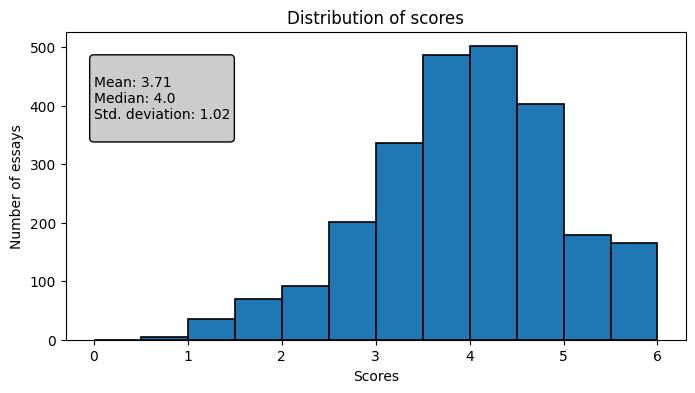

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.set_title('Distribution of scores')
ax.set_xlabel('Scores')
ax.set_ylabel('Number of essays')

event_stats = train_scores['score']
text = f"""
Mean: {event_stats.mean().round(2)}
Median: {event_stats.median().round(2)}
Std. deviation: {event_stats.std().round(2)}
"""
bbox = dict(boxstyle="round", fc="0.8")

event_stats.hist(bins=np.arange(0, 6.5, 0.5), edgecolor='black', linewidth=1.2, grid=False)
ax.annotate(text, (0,350),bbox=bbox)
plt.show()


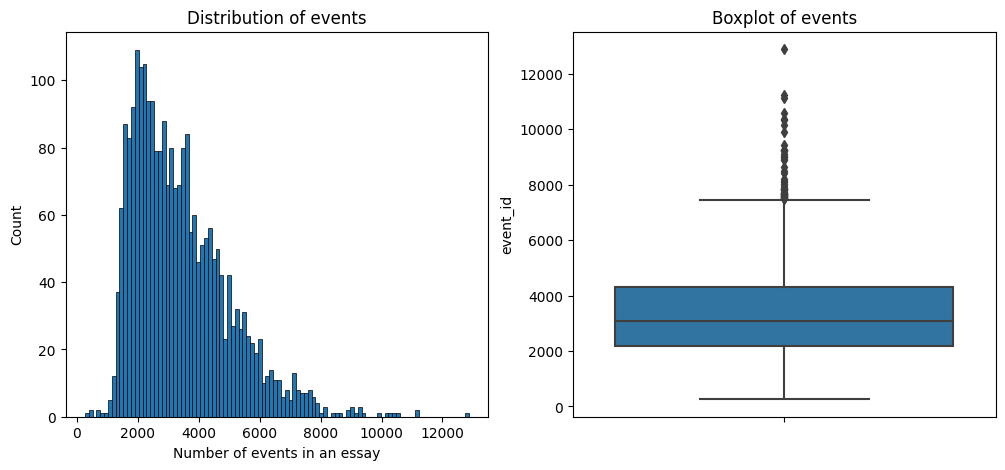

In [12]:
event_stats = train_data.groupby("id")['event_id'].count()

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Distribution of events')
ax[0].set_xlabel('Number of events in an essay')
ax[0].set_ylabel('Count')

event_stats.hist(bins=100,ax=ax[0],grid=False, edgecolor='black', linewidth=0.5)
ax[1].set_title('Boxplot of events')
sns.boxplot(y=event_stats.iloc[:], ax=ax[1])

plt.show()

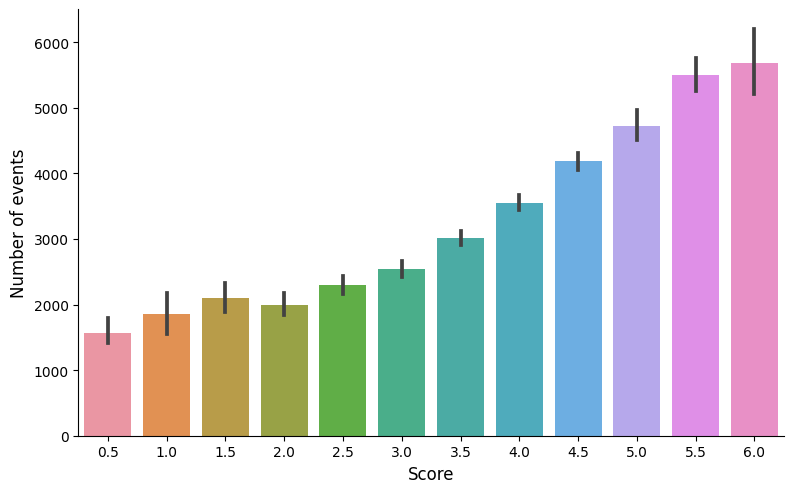

In [13]:
stats = train_data.groupby("id")["event_id"].max().reset_index()
stats_score = stats.merge(train_scores, on='id')

catplot = sns.catplot(data=stats_score, x="score", y="event_id", kind="bar", height=5, aspect=8/5)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Number of events', fontsize=12)
plt.show()

The bar plot above shows us that there is a positive correlation between number of events and the final score.

Time Variables

In [14]:
tmp = train_data["up_time"] - train_data["down_time"]
results = (tmp == train_data["action_time"])
results.value_counts()

True    8405898
Name: count, dtype: int64

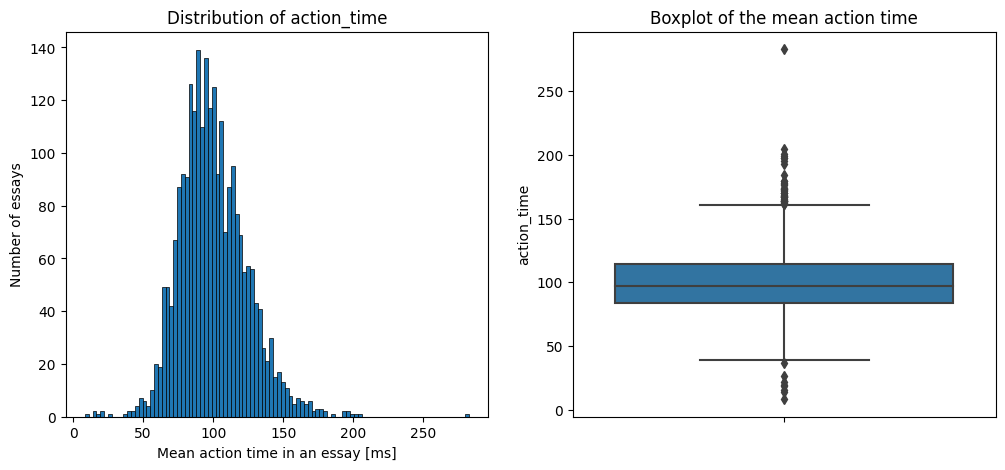

In [15]:
stats = train_data.groupby("id")["action_time"].mean()

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Distribution of action_time')
ax[0].set_xlabel('Mean action time in an essay [ms]')
ax[0].set_ylabel('Number of essays')
stats.hist(bins=100,grid=False,ax=ax[0], edgecolor='black', linewidth=0.5)
ax[1].set_title('Boxplot of the mean action time')
sns.boxplot(y=stats.iloc[:], ax=ax[1])
plt.show()

 ### Calculating the total time spend writing and essay

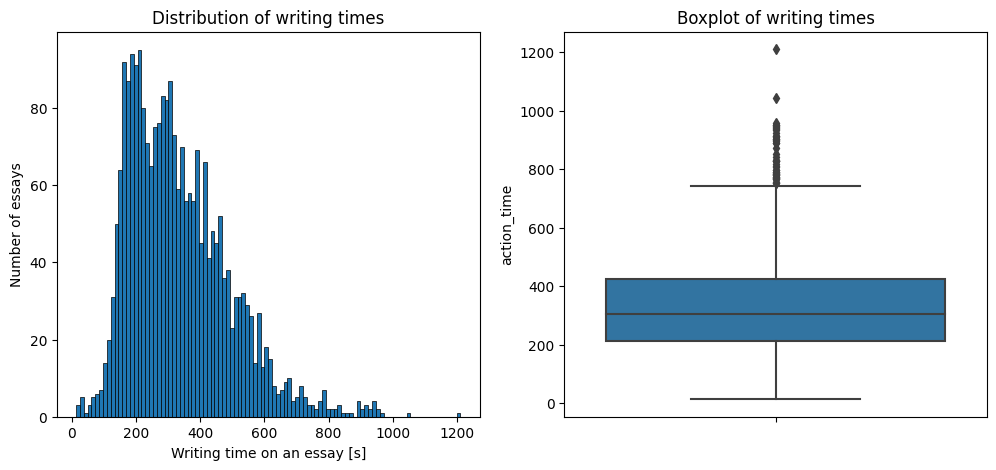

In [16]:
stats = train_data.groupby("id")["action_time"].sum().div(1000)

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Distribution of writing times')
ax[0].set_xlabel('Writing time on an essay [s]')
ax[0].set_ylabel('Number of essays')
stats.hist(bins=100,grid=False,ax=ax[0], edgecolor='black', linewidth=0.5)
ax[1].set_title('Boxplot of writing times')
sns.boxplot(y=stats.iloc[:], ax=ax[1])
plt.show()

### Checking if there is a correlation between total time and final score

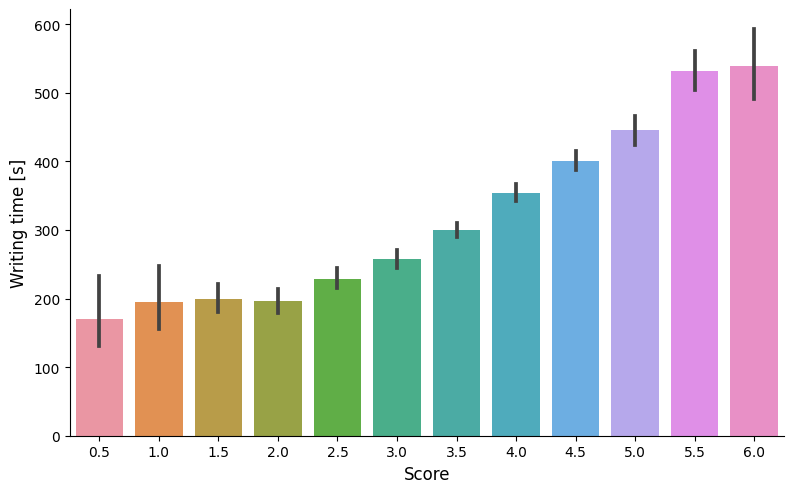

In [17]:
stats = train_data.groupby("id")["action_time"].sum().div(1000).reset_index()
stats_score = stats.merge(train_scores, on='id')

catplot = sns.catplot(data=stats_score, x="score", y="action_time", kind="bar", height=5, aspect=8/5)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Writing time [s]', fontsize=12)
plt.show()

### Activities

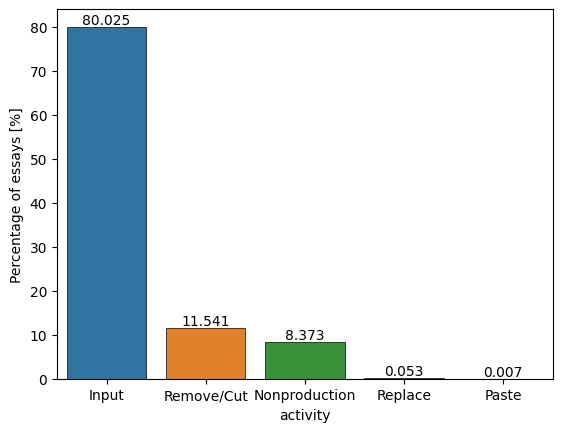

In [18]:
vals_of_interest = ['Nonproduction','Input','Remove/Cut','Paste','Replace']
sub_df = train_data[train_data['activity'].isin(vals_of_interest)]['activity']

tmp_stats = sub_df.value_counts()
tmp_stats = tmp_stats.div(len(sub_df)).mul(100)
tmp_stats = tmp_stats.round(3).reset_index()
ax = sns.barplot(tmp_stats, x="activity", y="count", errorbar=None, edgecolor='black', linewidth=0.5)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylabel("Percentage of essays [%]")
plt.show()

### Variables Down and Up Events

In [19]:
train_data['down_event'].value_counts()[:20]

down_event
q               5365319
Space           1207128
Backspace        964089
Shift            334227
ArrowRight       121338
Leftclick         91126
ArrowLeft         63217
.                 59586
,                 46806
ArrowDown         30874
ArrowUp           28189
Enter             22689
CapsLock          12568
'                 11170
Delete            10965
Unidentified       6151
Control            4885
"                  4102
-                  3843
?                  3155
Name: count, dtype: int64

In [20]:
print(f'Number of unique down events: {train_data["down_event"].nunique()}')
print(f'Number of unique up events: {train_data["up_event"].nunique()}')

Number of unique down events: 131
Number of unique up events: 130


In [21]:
set(train_data["up_event"].unique()).difference(set(train_data["down_event"].unique()))

{'k'}

In [22]:
set(train_data["down_event"].unique()).difference(set(train_data["up_event"].unique()))

{'F', 'I'}

### Which event is fastest and slowest

In [23]:
event_stats = train_data[["down_event", "up_event", "action_time"]]
event_stats = event_stats.groupby("down_event")["action_time"].mean().sort_values()
event_stats[:10]

down_event
j          0.0
l          0.0
F1         0.0
Pause      0.0
Control    0.0
Shift      0.0
T          0.0
Alt        0.0
F6         0.0
f          0.2
Name: action_time, dtype: float64

In [24]:
event_stats[-10:]

down_event
CapsLock        189.622215
Å              221.000000
C               222.000000
Leftclick       263.812425
Rightclick      320.974046
Meta            675.605428
ModeChange     1882.864865
F3             2212.555556
n              6237.750000
Process       35134.538462
Name: action_time, dtype: float64

If we draw a histogram of event we can find that these are very rare instances and most of event are at the beggining of the distribution. A plot on the right show the zoom on the first 95% of events in terms of activity time.

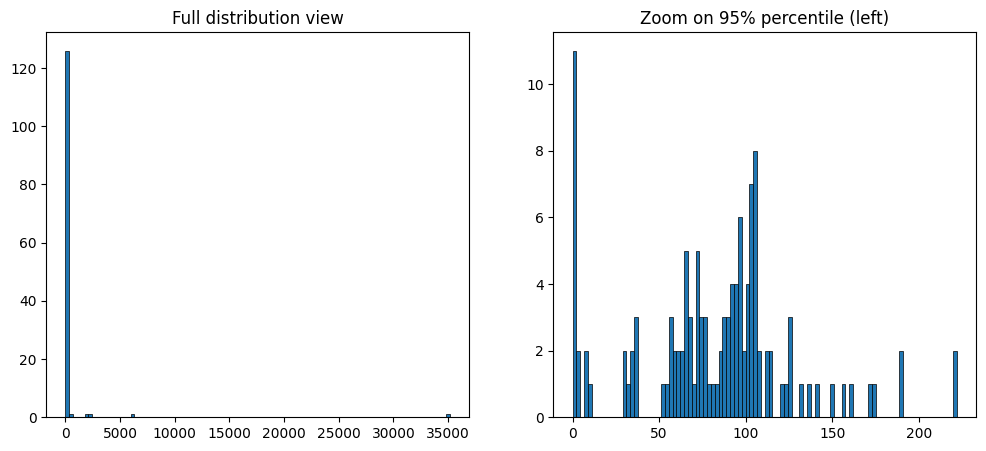

In [25]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Full distribution view')
event_stats.hist(bins=100,grid=False,ax=ax[0], edgecolor='black', linewidth=0.5)
ax[1].set_title('Zoom on 95% percentile (left)')
event_stats_95 = event_stats[event_stats<event_stats.quantile(0.95)]
event_stats_95.hist(bins=100,grid=False,ax=ax[1], edgecolor='black', linewidth=0.5)
plt.show()

### Cursor Position: Location of the cursor after the event, now calculating the length of the essays using the cursor position max

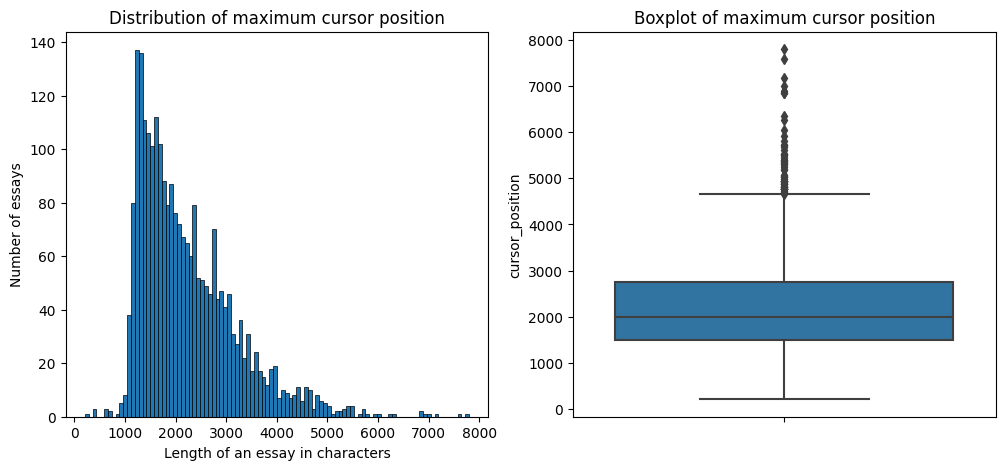

In [26]:
event_stats = train_data.groupby("id")['cursor_position'].max()

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Distribution of maximum cursor position')
ax[0].set_xlabel('Length of an essay in characters')
ax[0].set_ylabel('Number of essays')
event_stats.hist(bins=100,grid=False,ax=ax[0], edgecolor='black', linewidth=0.5)
ax[1].set_title('Boxplot of maximum cursor position')
sns.boxplot(y=event_stats.iloc[:], ax=ax[1])
plt.show()

### Word Count:
### Get: Length of words, number of words

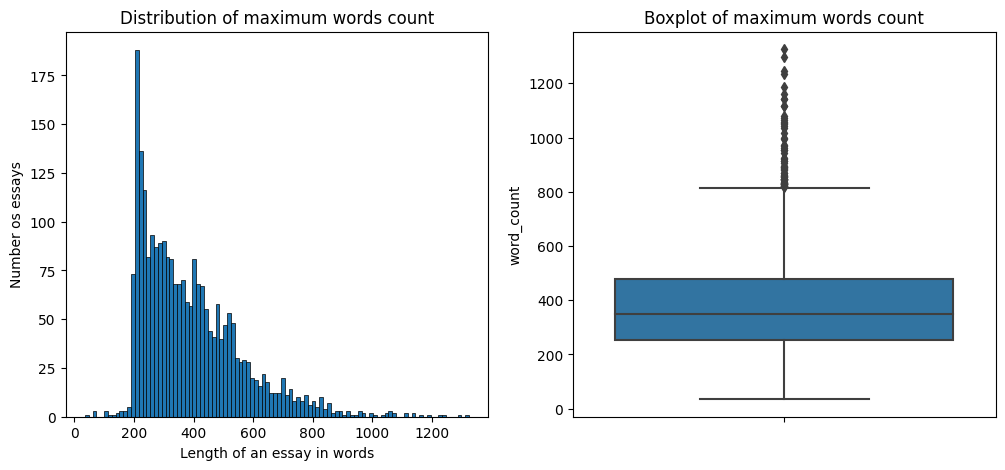

In [27]:
event_stats = train_data.groupby("id")['word_count'].max()

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].set_title('Distribution of maximum words count')
ax[0].set_xlabel('Length of an essay in words')
ax[0].set_ylabel('Number os essays')
event_stats.hist(bins=100,grid=False,ax=ax[0], edgecolor='black', linewidth=0.5)
ax[1].set_title('Boxplot of maximum words count')
sns.boxplot(y=event_stats.iloc[:], ax=ax[1])
plt.show()

### Correlation with scores of word count

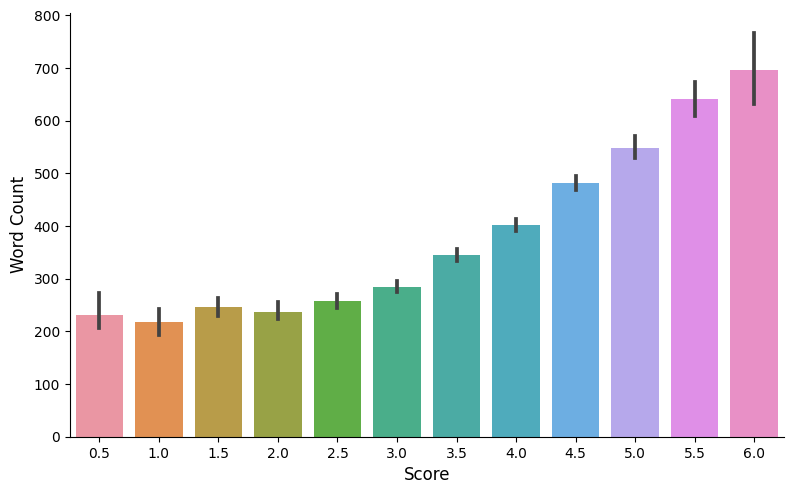

In [28]:
stats = train_data.groupby("id")['word_count'].max().reset_index()
stats_score = stats.merge(train_scores, on='id')

catplot = sns.catplot(data=stats_score, x="score", y="word_count", kind="bar", height=5, aspect=8/5)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.show()

# New Features

Now we have to engineer the new featues from the given dataset. The features would be of the following types:
1. Statistical Features related to the actions such as the mean, median, sum, max, min of the data
2. 

Since we have multiple keystroke logs for each essay and need to aggregate them for our machine learning model, our feature engineering approach should focus on summarizing the information across all logs per essay. Here are some aggregated feature suggestions:

Basic Statistical Features:

✅ Calculate basic statistics for time-related fields (action_time) for each user/essay like mean, median, std, min, max, skew, etc. These features can provide insights into the user's typing behavior and speed.

Text Composition Features:

✅ Count-Based Features: Frequency of Different Actions: Count the occurrences of each type of action (e.g., Input, Remove/Cut, Paste, Replace, Move). It shows how much editing, writing, and correcting happened.
✅ Total number of activities for each essay: which might capture how much effort was put into the essay.

Temporal (Time-Based) Features:

✅ Session Duration: Total time taken to write the essay (difference between the first and last event time). Total Writing Time: Total time spent on writing the essay = Sum of all session durations per essay or The time difference between the first and last event.
✅ Average Time per Event or Specific Activity Category: Average time per event or specific activity category, which might indicate the thought process involved. For each essay and each activity category, calculate the average action_time. This involves grouping the data by id and activity_type, and then taking the mean of action_time.

Text-Based Features:

✅ Final word count: The word_count from the last log entry of an essay, indicative of essay length.

Complex Behavioral Features:

✅ Error Correction Analysis: Deletion to insertion ratio = Ratio of 'Remove/Cut' events to 'Input' events, which might indicate how often a participant rephrases or corrects their essay.
✅ Overall Average Typing Speed: Compute the average typing speed across all logs. Typing speed is typically measured in words per minute (WPM).


LGBMRegressor

In [29]:
def RMSE(y_true,y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))